# Team Pusheen 

Shanfeng Feng             A13431031

Katy Zou                        A12740694

Christine Dai		A12706464

Zhening Huang	A13657055

Shih-Chuan Ku	A13345642


# Overview
YouTube video popularity can mean the difference between prediscovery Bieber and post-stardom Bieber. In order to better understand how the YouTube trending algorithm works, we analyzed different aspects of a dataset collected from the YouTube API. Our analysis compared the relative impact of each feature and its contribution to a video’s popularity. Our project revealed discrepancies between our analyses and those found on the internet and shed light on Youtube’s algorithm for popularity. 


# Main Question: What features do trending YouTube videos share that define popularity?
## Sub Questions: 
Q1: What main comparisons can we draw from the YouTube API data?

Q2: How do YouTubers gauge the best time of the week and day to quickly increase video popularity?

Q3: How quickly do trends change over time? 



# HYPOTHESIS: 
	
We hypothesize that YouTube video popularity (measured by the number of views and the like/dislike ratio) is influenced by the author (channel) and category/tags. Most users know what content they want to watch and search for it. The recommendation algorithm continues to promote similar videos to the user, discouraging them from exploring other categories. Although video trends change pretty quickly (videos do not stay popular for long), certain categories are more popular than other categories over a longer time frame. By interpreting the like/dislike ratios of a video, high frequency descriptions and tags, and video publish times, content makers can have a better understanding of when to publish and what to publish. We hypothesize that controversial videos, videos with a higher like/dislike ratio, are more attractive to the audience. We also hypothesize that it will take videos less time to become popular  if they are published during the weekend, because people have more free time to browse YouTube on the weekends/holidays.




# BACKGROUND & PRIOR WORK:

## Background
YouTube is one of the world’s largest video sharing and streaming websites. The recommendation system promotes videos with similar content on a user’s home page and recommended/related video section based on prior view history. YouTube is also a commercial platform that allows companies and individuals to advertise before select videos and/or on the homepage of viewers after paying for the position and duration. According to user preferences, YouTube can also recommend videos based on previously searched keywords and watched videos. This can be disabled by the viewer.[1] 

## Motivation
Our motivation for the analysis of YouTube statistics is to better understand the content that makes the streaming platform so popular. Some of the biggest YouTubers today started during their college career. Therefore, understanding user base and preferences can help potential, aspiring YouTubers (potentially us) establish themselves in the growing competitive platform. 
The significance of this research is due to the fact that YouTube content creators are allowed to monetize their video, which allows them to gain advertisement revenues as users watch and click on advertisements included in their video.[2] This incentivizes the YouTubers to find out methods that can help increase the view count and popularity of their videos to make more revenue out of YouTube. In addition, YouTube's popularity allow it to become a platform for distributing ideas and opinions. Thus, a popular video could bring awareness to things that society might often neglect.

Our Kaggle dataset was retrieved from the YouTube website using their API. The author of the dataset is Mitchell J. The dataset contains the basic statistics for the top 200 trending videos by day. 

Many similar studies were done to investigate the growth behavior and trending statistics of YouTube:
External studies and guides: 
Statistics and Social Network on YouTube[3]. In this study, the researches have crawled the YouTube site for four months, collecting more than 3 million YouTube videos’ data, in which they have found that YouTube videos have a unique growth trend, where videos that are popular will become more popular, while unpopular videos will remain unpopular. The researches have also defined an “active life span” of a video which indicates the period of time that a video will stop growing after a certain period of time.

Kernels[4] generated from Kaggle dataset (different dataset):
Data exploration[5] -- discovered a high correlation between views and likes, most common title/description bigrams, most common time of publication, sentiment analysis, etc. This study was done on the entire dataset encompassing all countries present.
Analysis of most popular category[6]
International trends -- popularity endurance by country, the correlation between popularity in multiple countries, etc.[7]




# DATASET:
Our Kaggle dataset was retrieved from the YouTube website using their API. The author of the dataset is Mitchell J. The dataset contains the basic statistics for the top 200 trending videos by day. https://www.kaggle.com/datasnaek/youtube-new

Some concerns over our data include the origin of views, unknown variables not represented in the dataset, and the range of our data set. 

## Kinds of features:
15 column features: 
['video_id',
 'trending_date',
 'title',
 'channel_title',
 'category_id',
 'publish_time',
 'tags',
 'views',
 'likes',
 'dislikes',
 'comment_count',
 'comments_disabled',
 'ratings_disabled',
 'video_error_or_removed',
 'description']

## Number of observations: 
6351 videos total


# SETUPS:
We used numpy, pandas, matplotlib, and datetime to help us analyze and visualize given dataset. 

In [58]:
# YouTube Popularity
# Imports
# 
# Do not import any other functions / packages

# Display plots directly in the notebook instead of in a new window
%matplotlib inline

# Import libraries (download with pip install if computer doesn't have module)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [59]:
# Configure libraries
# The seaborn library makes plots look nicer
sns.set()
sns.set_context('talk')

# Don't display too many rows/cols of DataFrames
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8

# Round decimals when displaying DataFrames
pd.set_option('precision', 2)

# DATA CLEANING:
We decided to break down the code into three sections. This was chosen as the most efficient way to divide tasks and merge seamlessly. For each category, we started off by replacing the category ids with the actual category names. This is because the numerical representation (category_id = 1) means nothing without the actual names. Secondly, the duplicates were dropped. This is because the trending videos can be duplicated over time. We wanted to keep the latest trending times and latest trending views. 

Partial cleaning was also done for Q1 where the ratio between likes and dislikes were calculated for each video. The ratio needed to be significant; it was normalized by setting the threshold to the median views of the videos. In the second part of Q1, the tag text was tokenized into individual columns using the .explode() function to make the groupby process easier. 

In Q2, cleaning was done to the trending date and publish time. This is done using the datetime.strptime function so that dates can be compared to each other to calculate the time difference between the publish date and the trending date.

For Q3, the data was sanitized to find the number of occurrences of a video in the dataset via taking a count of the number of entries for each video id in the dataframe used in Q1 and Q2. Since multiple entries were removed in earlier sanitizations, the data had to be loaded in again from the CSV and placed into a new dataframe. This was then used to extract the videos that surfaces the most often in the dataset - videos that trended the longest, specifically the three top longest-trending day counts - and videos that surfaced the least, stored in their own dataframes. These were then merged with tag and category data. 



In [60]:
# read in data files for US --- Clean up data for Q1
# Main Question: What factors contribute the most to YouTube video popularity?
df_USVids = pd.read_csv("USvideos_idsReplaced.csv")

if('thumbnail_link' in df_USVids.columns):
    df_USVids = df_USVids.drop(['thumbnail_link'], axis=1)

df_USVids.drop_duplicates(subset='video_id', keep="last", inplace=True)

viewMedian = df_USVids['views'].median()
assert('thumbnail_link' not in list(df_USVids.columns))

# show existing columns
list(df_USVids.columns)

['video_id',
 'trending_date',
 'title',
 'channel_title',
 'category_id',
 'publish_time',
 'tags',
 'views',
 'likes',
 'dislikes',
 'comment_count',
 'comments_disabled',
 'ratings_disabled',
 'video_error_or_removed',
 'description']

In [61]:
# Extract data set for q1
# What causes videos to get more views?
# (views, tag, category, dislikes, likes, video length, channel title, video title, comment count, video id)
df_Factors = df_USVids[['video_id', 'views', 'tags','category_id', 'likes', 'dislikes', 'comment_count', 'title',
                       'channel_title']].copy()

In [62]:
def explode(df, cols, split_on):
    """
    Explode dataframe on the given column, split on given delimeter. Explode = use one entry's data into multiple rows
    """
    cols_sep = list(set(df.columns) - set(cols))
    df_cols = df[cols_sep]
    explode_len = df[cols[0]].str.split(split_on).map(len)
    repeat_list = []
    for r, e in zip(df_cols.values, explode_len):
        repeat_list.extend([list(r)]*e)
    df_repeat = pd.DataFrame(repeat_list, columns=cols_sep)
    df_explode = pd.concat([df[col].str.split(split_on, expand=True).stack().str.strip().reset_index(drop=True)
                            for col in cols], axis=1)
    df_explode.columns = cols
    return pd.concat((df_repeat, df_explode), axis=1)

In [63]:
def cal_Dislike_Ratio(row):
    if((row['dislikes'] == 0 and row['likes'] == 0) or row['views'] < viewMedian):
        return 0
    return (100.0 * row['dislikes']) / (row['dislikes'] + row['likes'])

def cal_Like_Ratio(row):
    if((row['dislikes'] == 0 and row['likes'] == 0) or row['views'] < viewMedian):
        return 0
    return (100.0 * row['likes']) / (row['dislikes'] + row['likes'])

In [64]:
# Category vs (views, likes, dislikes, comments)
df_CategoryViewsLikeDislike = df_Factors[['views', 'category_id', 'likes', 'dislikes', 'comment_count']].copy()

# make group by inplace
grouped = df_CategoryViewsLikeDislike.groupby(['category_id'])
df_CategoryViewsLikeDislike = grouped.aggregate(np.sum).reset_index()


df_CategoryViewsLikeDislike['likeRatio'] = df_CategoryViewsLikeDislike.apply (lambda row: cal_Like_Ratio(row), axis=1)

# DATA ANALYSIS:

In [65]:
# sanitized tags from delimited by | to each tag is one row.
df_TagsViewsLikeDislike = df_Factors[['views', 'tags', 'likes', 'dislikes', 'comment_count']].copy()
df_TagsViewsLikeDislike = explode(df_TagsViewsLikeDislike, ['tags'], '|')
df_TagsViewsLikeDislike.sort_values(by='views', inplace=True)
df_TagsViewsLikeDislike.drop_duplicates('views',keep='last',inplace=True)

# make group by inplace
grouped_T = df_TagsViewsLikeDislike.groupby(['tags'])
df_TagsViewsLikeDislike = grouped_T.aggregate(np.sum).reset_index()

df_TagsViewsLikeDislike['dislikeRatio'] = df_TagsViewsLikeDislike.apply (lambda row: cal_Dislike_Ratio(row), axis=1)
df_TagsViewsLikeDislike['likeRatio'] = df_TagsViewsLikeDislike.apply (lambda row: cal_Like_Ratio(row), axis=1)


df_viewLargest = df_TagsViewsLikeDislike.nlargest(30, 'views')
df_viewSmallest = df_TagsViewsLikeDislike.nsmallest(30, 'views')
df_commentLargest = df_TagsViewsLikeDislike.nlargest(30, 'comment_count')
df_likeLargest = df_TagsViewsLikeDislike.nlargest(30, 'likeRatio')
df_dislikeLargest = df_TagsViewsLikeDislike.nlargest(30, 'dislikeRatio')

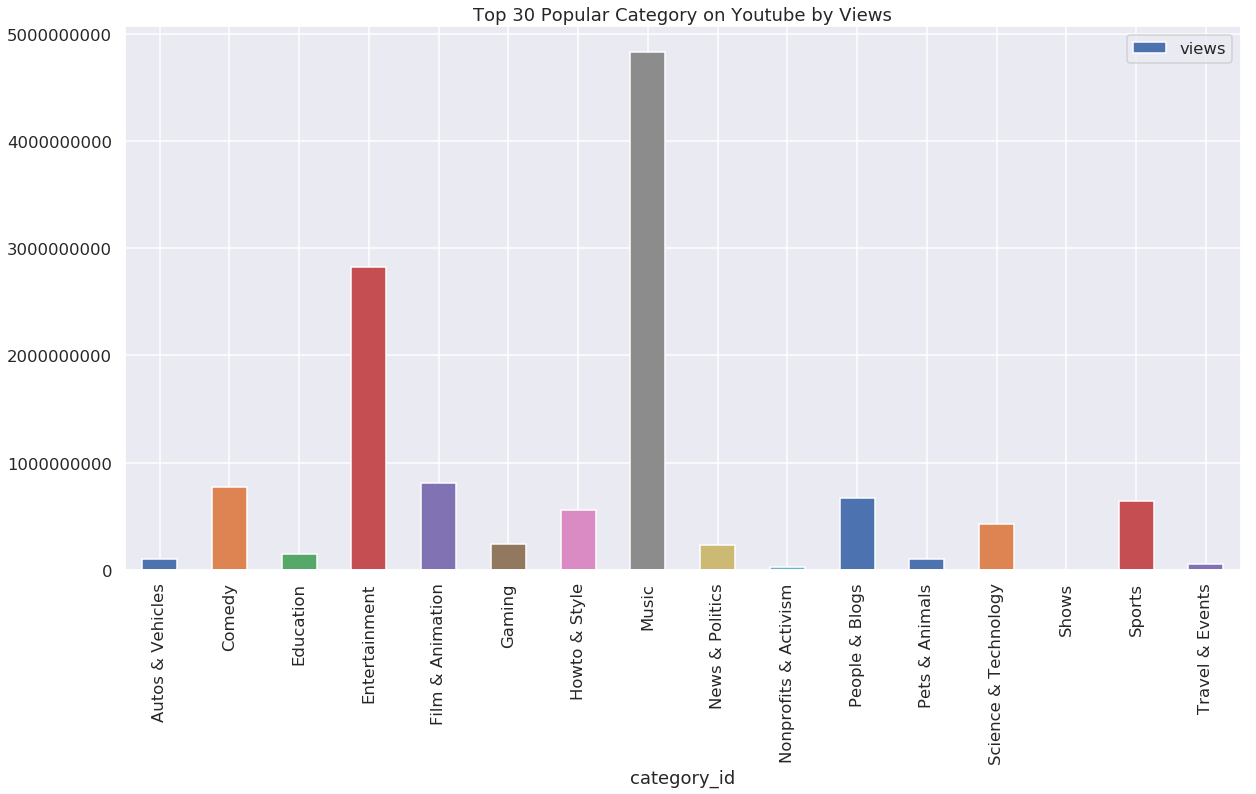

In [66]:
# Category vs Views
CatVsViewsPlt = df_CategoryViewsLikeDislike.plot.bar(x='category_id', y='views', title='Top 30 Popular Category on YouTube by Views',
                                                figsize=(20,10))
CatVsViewsPlt.ticklabel_format(axis='y', style='plain')

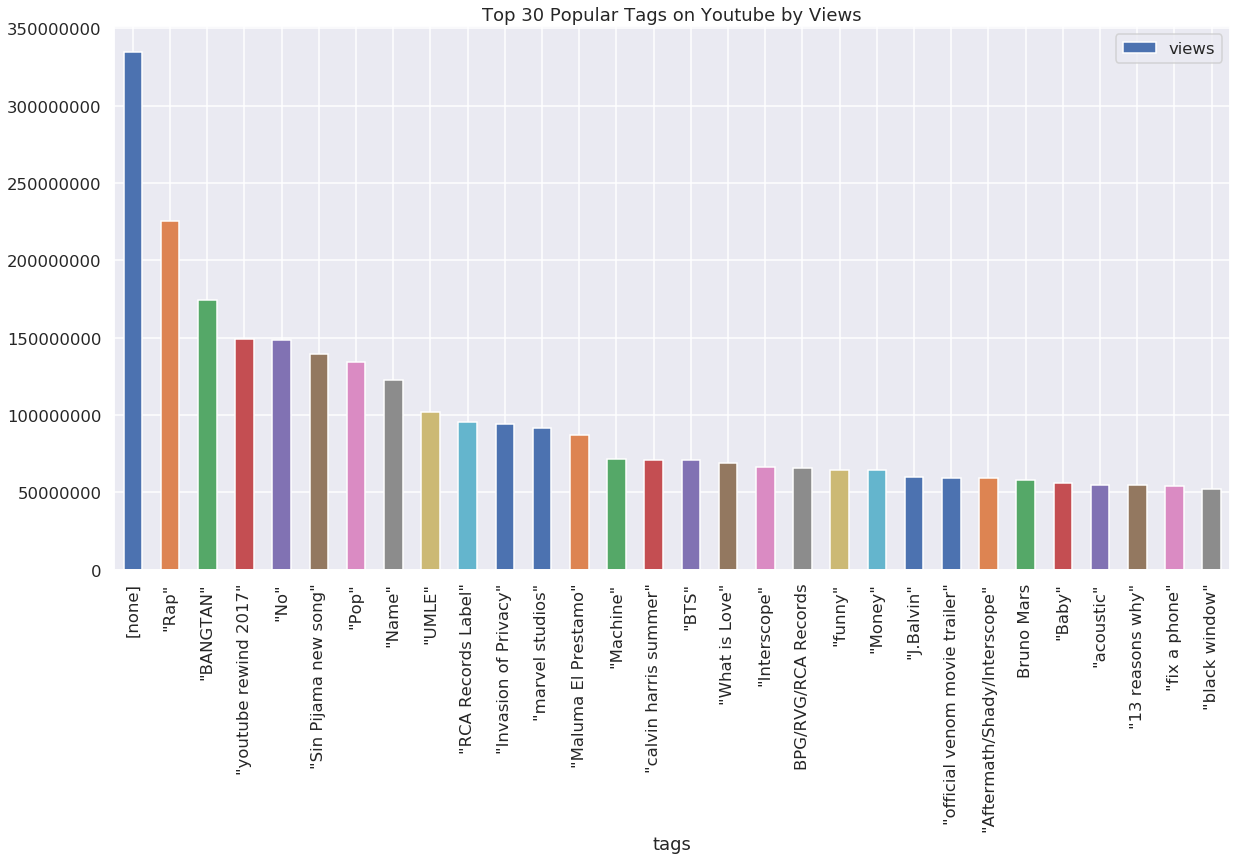

In [67]:
TagsVsViewsPlt = df_viewLargest.plot.bar(x='tags', y='views', title='Top 30 Popular Tags on YouTube by Views',
                                                figsize=(20,10))
TagsVsViewsPlt.ticklabel_format(axis='y', style='plain')

[Tags vs View, Category vs View]

However, we did find a strong correlation between views and category/tags. As we can observe from the graph, music and entertainment are the top categories with most views. If we look closely at the popular tags, we can also see that tags are mostly related to singers or different genres of music. In both graphs, the trend of music and entertainment being dominant groups in YouTube is vividly displayed. This phenomenon could be a product of how celebrity life and music is closely integrated into popular culture today.


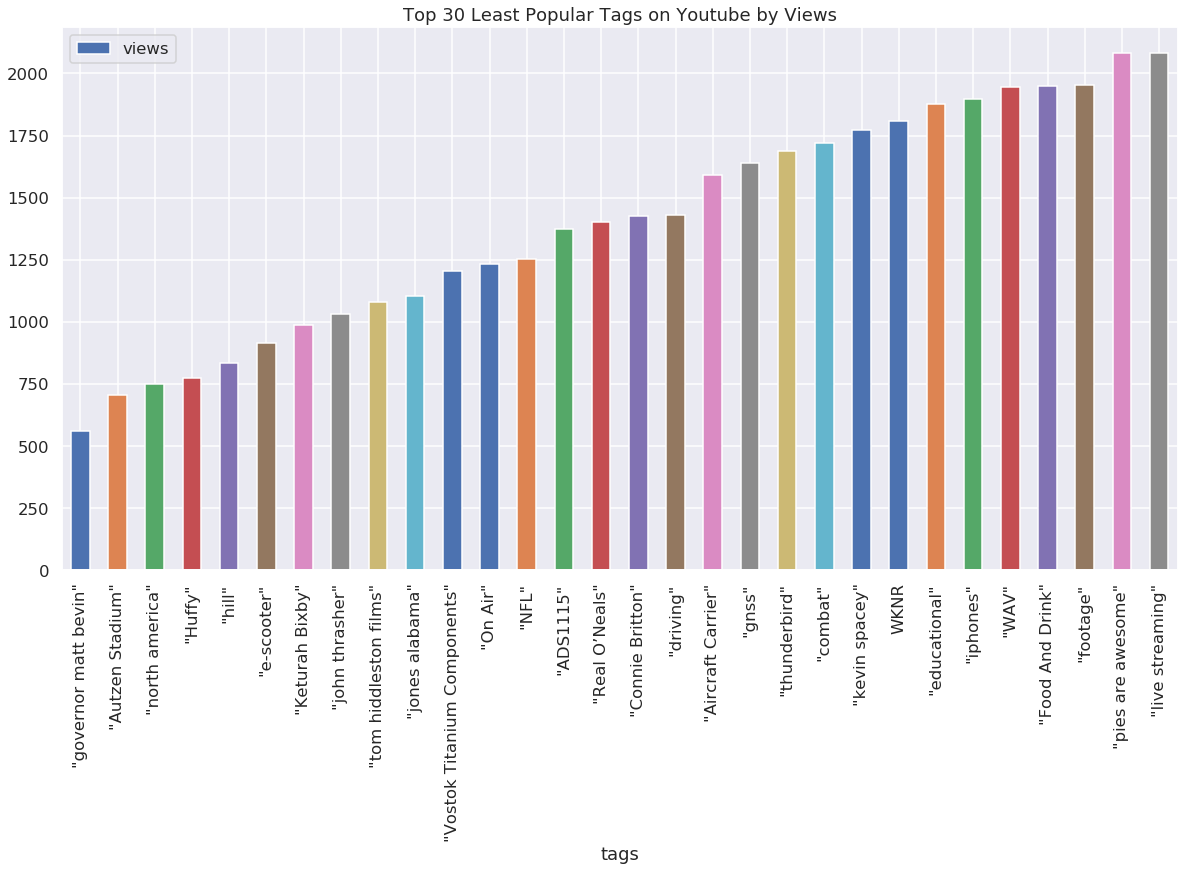

In [68]:
TagsVsViewsPltS = df_viewSmallest.plot.bar(x='tags', y='views', title='Top 30 Least Popular Tags on YouTube by Views',
                                                figsize=(20,10))
TagsVsViewsPltS.ticklabel_format(axis='y', style='plain')

[ Least Popular Tags]

In contrast, we can see that tags are least popular by views seems to be tags related to autos, politics, and even sports. This phenomenon reinforces the fact that most users on YouTube browses video about music and entertainment rather than politics and autos.


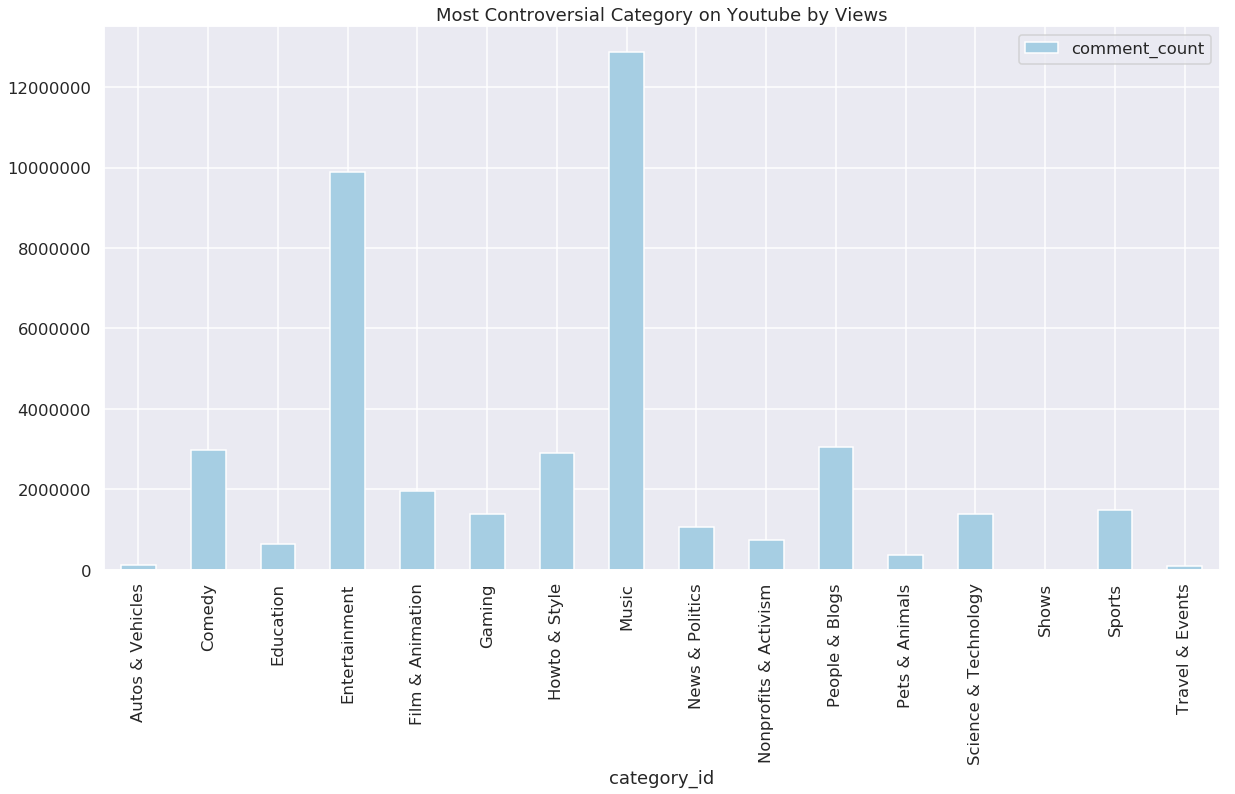

In [69]:
# Category vs Comment Count
CatVsViewsPlt = df_CategoryViewsLikeDislike.plot.bar(x='category_id', y='comment_count', title='Most Controversial Category on Youtube by Views',
                                                figsize=(20,10), colormap='Paired')
CatVsViewsPlt.ticklabel_format(axis='y', style='plain')

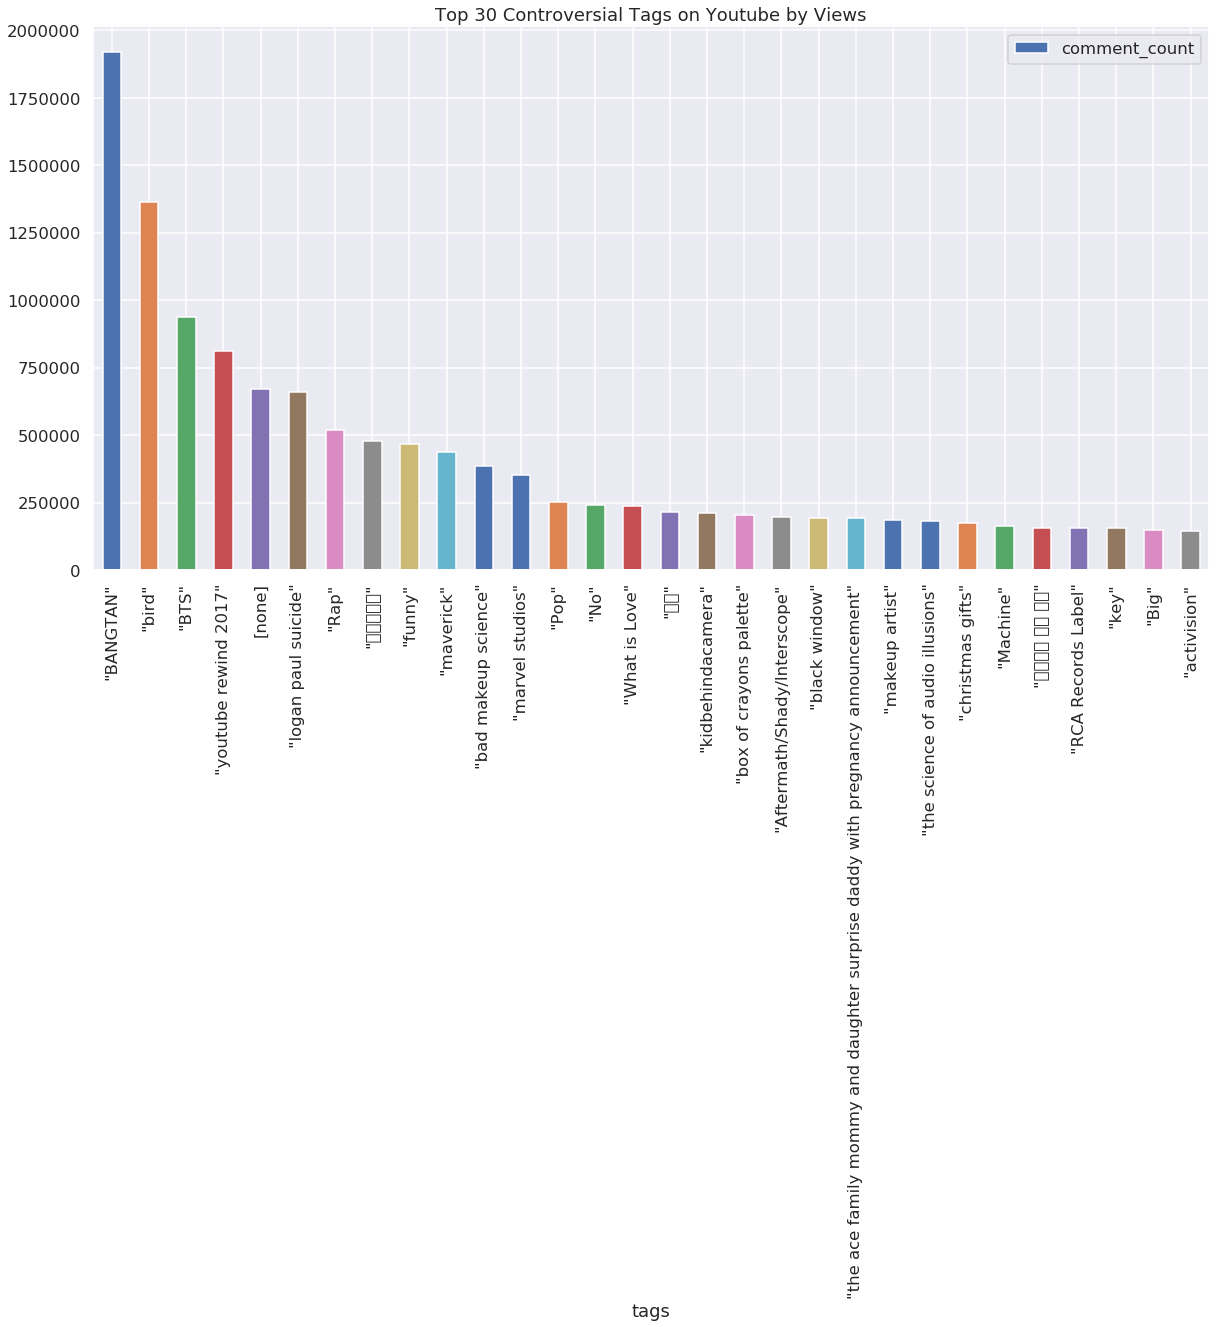

In [70]:
TagsVsViewsPlt = df_commentLargest.plot.bar(x='tags', y='comment_count', title='Top 30 Controversial Tags on Youtube by Views',
                                                figsize=(20,10))
TagsVsViewsPlt.ticklabel_format(axis='y', style='plain')

[Comment count vs Category]

Besides looking at view count, we find that music and entertainment are the categories that are most controversial as well. From the graph we can see the two outliers portrays how users are more likely to comment or discuss on a video if they are music/entertainment video. This further reinforces the idea of society being more focused on music and entertainment. Thus popularity follows with the field of entertainment/music. On the other hand, the fact that other categories being less controversial could be due to the nature of YouTube. YouTube is not mainly advertised as a news, travel, or autos platform. Therefore, it is less likely for users to engage with video in such category due to lack of initial motivation to do so.


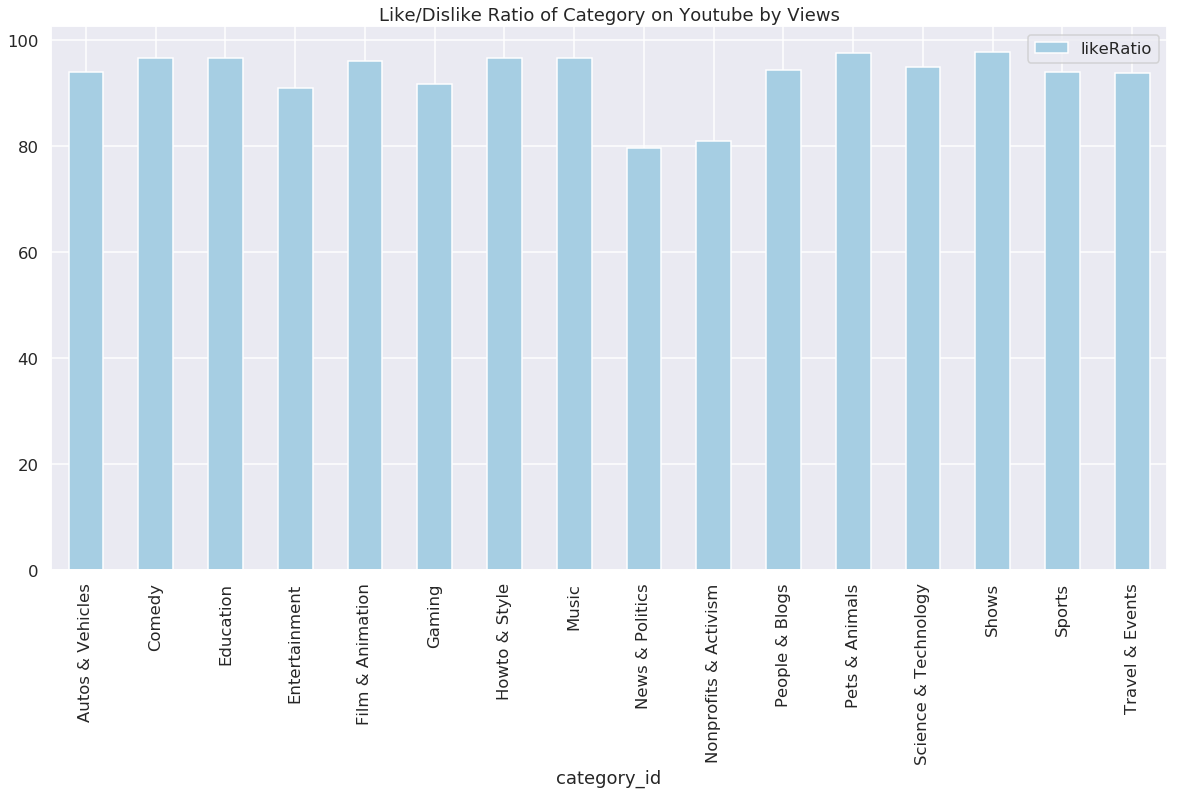

In [71]:
CatVsLikesPlt = df_CategoryViewsLikeDislike.plot.bar(x='category_id', y='likeRatio', title='Like/Dislike Ratio of Category on Youtube by Views',
                                                figsize=(20,10), colormap='Paired')
CatVsLikesPlt.ticklabel_format(axis='y', style='plain')

[Like Ratio vs Views]

Contrary to the Kaggle analyses we studied from others’ works, we did not find a strong correlation between the number of views and likes. This may be explained by the fact that our dataset contained US trending videos from a different time period. In addition, the way we measured how a video is perceived by the audience is by the like ratio (likes / (likes + dislikes)). The like ratio is normalized by only considering videos that have views over the median number of views in our dataset. Since our dataset is different from the previous Kaggle analyses, with our dataset smaller in a shorter time frame, it might explain why we did not find a strong correlation between views and likes. 


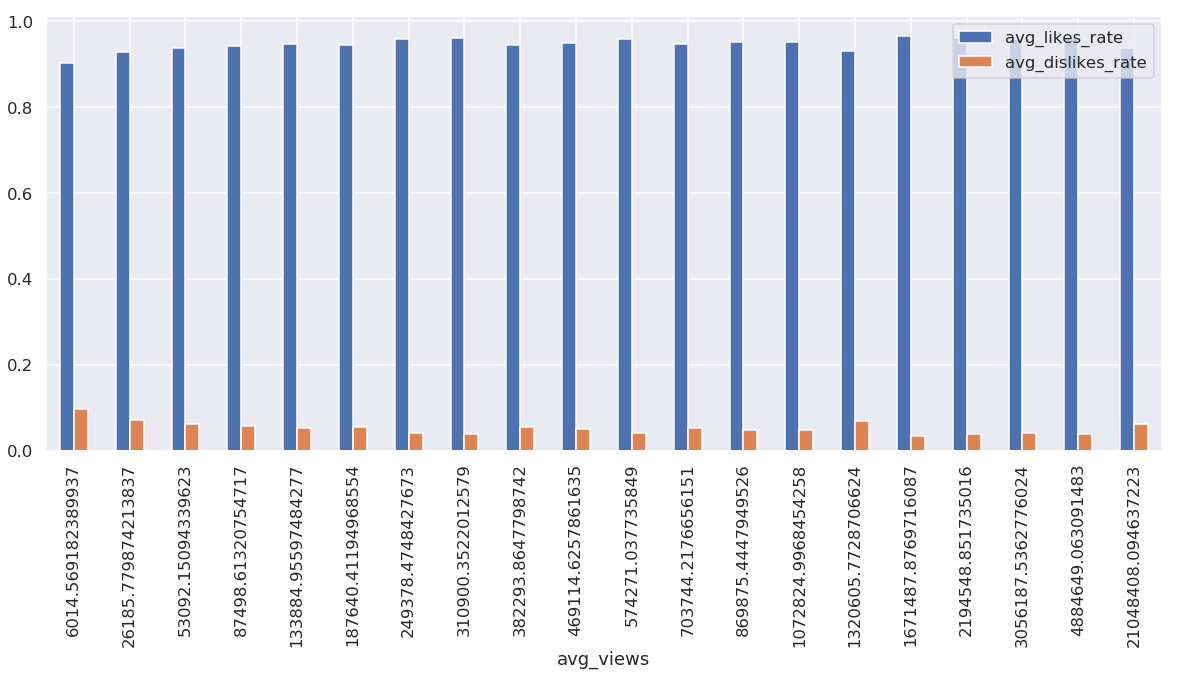

In [72]:
# likes/dislikes vs view

# top20views = df_Factors.copy().nlargest(20, 'views')
# top20views

sort_by_views = df_Factors.copy().sort_values('views')
grouplist = np.array_split(sort_by_views, 20)
# print(grouplist)
# print(grouplist[0]['views'])
group_by_views = pd.DataFrame(columns=['avg_views', 'avg_likes_rate', 'avg_dislikes_rate'])
for i in range(len(grouplist)):
    avg_view = grouplist[i]['views'].mean()
    like_dislike_count = grouplist[i]['likes'].mean() + grouplist[i]['dislikes'].mean()
    avg_likes = grouplist[i]['likes'].mean() / like_dislike_count
    avg_dislikes = grouplist[i]['dislikes'].mean() / like_dislike_count
    group_by_views.loc[i] = [avg_view, avg_likes, avg_dislikes] 
    
# group_by_views

group_by_views.plot.bar(x='avg_views', y=['avg_likes_rate', 'avg_dislikes_rate'], figsize=(20,8))
# group_by_views.plot.bar(x='avg_views', y='avg_likes_rate', figsize=(20,8))
# group_by_views.plot.bar(x='avg_views', y='avg_dislikes_rate', figsize=(20,8))

[Like Ratio vs Views]

Contrary to the Kaggle analyses we studied from others’ works, we did not find a strong correlation between the number of views and likes. This may be explained by the fact that our dataset contained US trending videos from a different time period. In addition, the way we measured how a video is perceived by the audience is by the like ratio (likes / (likes + dislikes)). The like ratio is normalized by only considering videos that have views over the median number of views in our dataset. Since our dataset is different from the previous Kaggle analyses, with our dataset smaller in a shorter time frame, it might explain why we did not find a strong correlation between views and likes. 


In [73]:
# sanitize data for q2
# How do Youtubers gauge the best time of the week and day to quickly increase video popularity? (publishing time, day of the week, compared over time)
list(df_USVids.columns)

['video_id',
 'trending_date',
 'title',
 'channel_title',
 'category_id',
 'publish_time',
 'tags',
 'views',
 'likes',
 'dislikes',
 'comment_count',
 'comments_disabled',
 'ratings_disabled',
 'video_error_or_removed',
 'description']

In [74]:
df_TimeAndWeek = df_USVids[['video_id', 'category_id', 'tags', 'trending_date', 'title', 'publish_time', 'views']].copy()

In [75]:
for index, row in df_TimeAndWeek.iterrows():
    df_TimeAndWeek.loc[index, 'publish_date'] = datetime.strptime(row['publish_time'], '%Y-%m-%dT%H:%M:%S.000Z').strftime("%Y-%m-%d")
    df_TimeAndWeek.loc[index, 'publish_date_of_week'] = datetime.strptime(row['publish_time'], '%Y-%m-%dT%H:%M:%S.000z').strftime("%A")
    df_TimeAndWeek.loc[index, 'publish_time'] = datetime.strptime(row['publish_time'], '%Y-%m-%dT%H:%M:%S.000z').strftime("%I:%M:%S")
    df_TimeAndWeek.loc[index, 'trending_date'] = datetime.strptime(row['trending_date'], '%y.%d.%m').strftime("%Y-%m-%d")

In [76]:
df_TimeAndWeek

,video_id,category_id,tags,trending_date,...,publish_time,views,publish_date,publish_date_of_week
10,9wRQljFNDW8,Sports,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",2017-11-14,...,02:05:26,81377,2017-11-13,Monday
36,Om_zGhJLZ5U,Film & Animation,"screenjunkies|""screen junkies""|""sj news""|""hone...",2017-11-14,...,06:00:03,288922,2017-11-12,Sunday
41,goP4Z5wyOlM,News & Politics,"bbc|""bbc news""|""news""|""iran""|""iran news""|""iraq...",2017-11-14,...,09:16:40,34785,2017-11-12,Sunday
...,...,...,...,...,...,...,...,...,...
40946,D6Oy4LfoqsU,Entertainment,I gave safiya nygaard a perfect hair makeover ...,2018-06-14,...,05:34:22,1066451,2018-05-18,Friday
40947,oV0zkMe1K8s,Film & Animation,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",2018-06-14,...,05:00:04,5660813,2018-05-17,Thursday
40948,ooyjaVdt-jA,Gaming,"call of duty|""cod""|""activision""|""Black Ops 4""",2018-06-14,...,05:09:38,10306119,2018-05-17,Thursday


In [77]:
# calculate date difference between publish_date and trending_date
def cal_date_diff(row):
        return ((datetime.strptime(row['trending_date'],"%Y-%m-%d") - datetime.strptime(row['publish_date'],"%Y-%m-%d")).days)

In [78]:
df_TimeAndWeek['date_difference'] = df_TimeAndWeek.apply (lambda row: cal_date_diff(row), axis=1)

In [79]:
# count number of days for a video to become trending and plot graph
count_date = {};
for index, row in df_TimeAndWeek.iterrows():
    day_diff = row['date_difference']
    if day_diff in count_date:
        count_date[day_diff] += 1
    else:
        count_date[day_diff] = 1

In [80]:
count_date_differences = pd.DataFrame.from_dict(count_date, orient='index', columns=['count'])

Text(0, 0.5, 'Number of Videos')

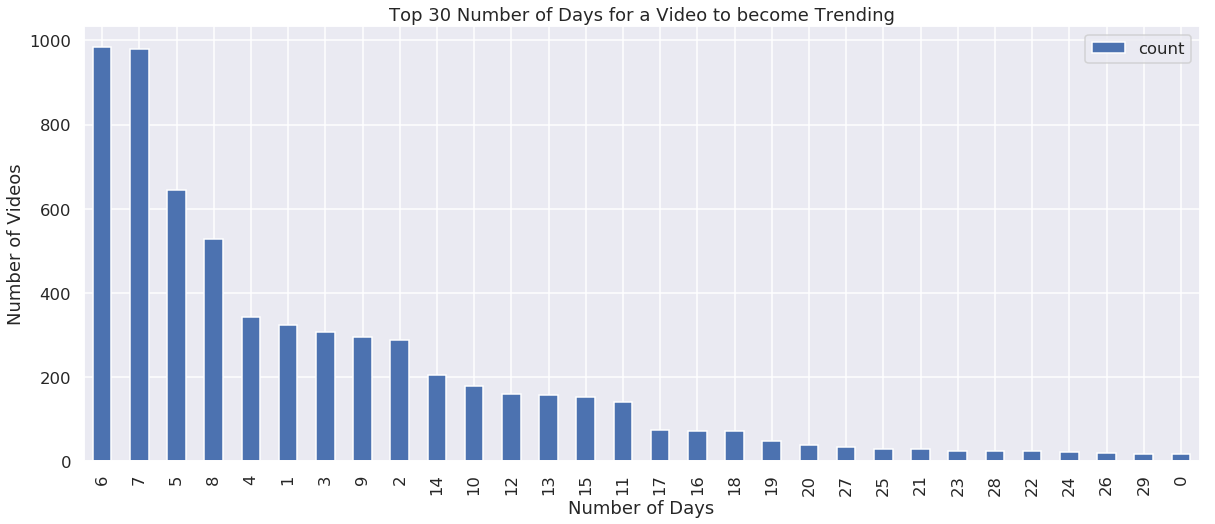

In [81]:
DaysToTrending = count_date_differences.nlargest(30, 'count').plot.bar(title='Top 30 Number of Days for a Video to become Trending', figsize=(20,8))
DaysToTrending.set_xlabel("Number of Days")
DaysToTrending.set_ylabel("Number of Videos")

[Number of days for a video to trend]

Most videos become trending within a week, and a large portion of these videos become trending at the 6th or 7th day since their publish date. According to YouTube, the trending factors include but not limited to: view count, rate of growth in views, where views are coming from, and the age of the video. This means that there needs to be views and a growth of views for a video to become trending. Therefore, this revealed that 1 week is the timeframe that most video needs for it to be discovered, shared, and watched to become trending. Any video that has been published for a week or longer and did not reach trending status has a lower chance of becoming trending.

In [82]:
# count average number of days for a video to become trending by publish date of week and plot graph
count_dateofweek = {};
sum_dateofweek = {};
for index, row in df_TimeAndWeek.iterrows():
    day_of_week = row['publish_date_of_week']
    if day_of_week in count_dateofweek:
        count_dateofweek[day_of_week] += 1
        sum_dateofweek[day_of_week] += row['date_difference']
    else:
        count_dateofweek[day_of_week] = 1
        sum_dateofweek[day_of_week] = row['date_difference']

In [83]:
average_dateofweek = {};
for day in count_dateofweek:
    average_dateofweek[day] = sum_dateofweek[day] / count_dateofweek[day]


In [84]:
count_dateofweek_differences = pd.DataFrame.from_dict(average_dateofweek, orient='index', columns=['average'])
count_dateofweek

{'Friday': 1047,
 'Monday': 985,
 'Saturday': 548,
 'Sunday': 558,
 'Thursday': 1056,
 'Tuesday': 1060,
 'Wednesday': 1097}

Text(0, 0.5, 'Number of Days')

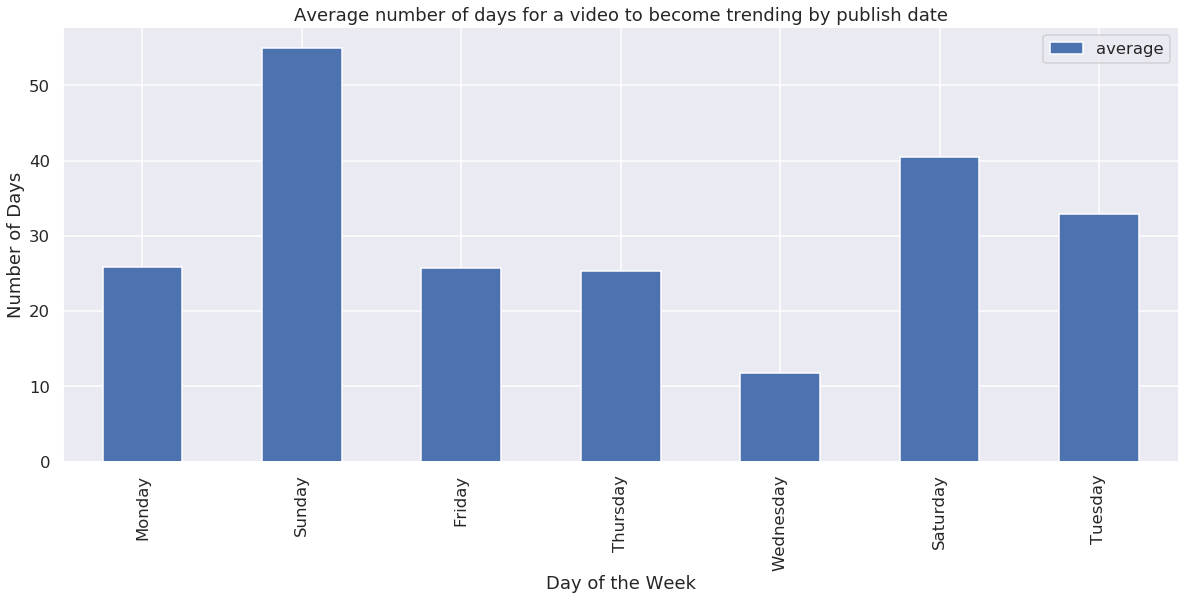

In [85]:
DaysToTrending = count_dateofweek_differences.plot.bar(title='Average number of days for a video to become trending by publish date', figsize=(20,8))
DaysToTrending.set_xlabel("Day of the Week")
DaysToTrending.set_ylabel("Number of Days")

[Number of days to trend by publish day of the week]

From the analysis of publish day, videos that are published on Wednesday have the lowest average amount of days to become tending, and videos that are published on Sunday have the highest average amount of days to become trending. In addition, it is interesting to note that in our sample set, Wednesday has the highest amount of videos published, while Sunday has the least amount of videos published. This can be explained by the amount of viewership on YouTube. An independent study10 has revealed that YouTube viewership ramps up from Wednesday, and drops at Sunday. Therefore, it is more likely a video to be watched and become trending between Wednesday and Sunday, making Wednesday the most optimal time of week to post videos to allow YouTube videos to gain enough viewership for trending.

In [86]:
# count average days that different video categories become trending and plot graph
count_category = {};
sum_category = {};
for index, row in df_TimeAndWeek.iterrows():
    category = row['category_id']
    if category in count_category:
        count_category[category] += 1
        sum_category[category] += row['date_difference']
    else:
        count_category[category] = 1
        sum_category[category] = row['date_difference']

In [87]:
average_category = {};
for category in count_category:
    average_category[category] = sum_category[category] / count_category[category]

In [88]:
category_differences = pd.DataFrame.from_dict(average_category, orient='index', columns=['average'])
count_category

{'Autos & Vehicles': 71,
 'Comedy': 544,
 'Education': 251,
 'Entertainment': 1621,
 'Film & Animation': 320,
 'Gaming': 103,
 'Howto & Style': 594,
 'Music': 801,
 'News & Politics': 504,
 'Nonprofits & Activism': 14,
 'People & Blogs': 495,
 'Pets & Animals': 140,
 'Science & Technology': 381,
 'Shows': 4,
 'Sports': 449,
 'Travel & Events': 59}

Text(0, 0.5, 'Number of days')

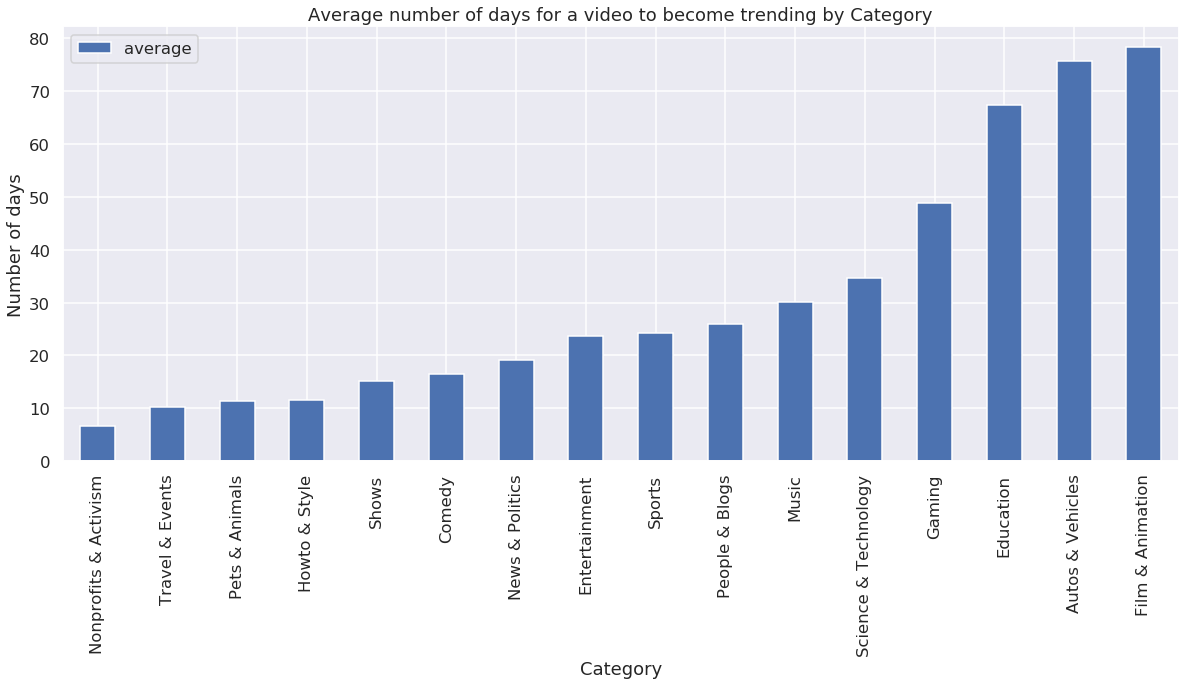

In [89]:
CategoryAverageTrending = category_differences.nsmallest(30, 'average').plot.bar(title='Average number of days for a video to become trending by Category', figsize=(20,8))
CategoryAverageTrending.set_xlabel("Category")
CategoryAverageTrending.set_ylabel("Number of days")

[Number of days to trending by category]

Surprisingly, the category that takes the least average amount of days to become trending is “Nonprofits & Activism”. The category that takes the most average amount of days to become trending is “Film and Animation”. However, it is important to note that there are only 14 videos with the category “Nonprofits & Activism”, therefore, there is a high possibility that this result is an outlier. The category that has the second lowest average number of days to becoming trending is “Travel and Events”. These categories that have lower average number of days to become trending are significantly different categories compared to the video categories who have the highest views. Perhaps this hints that view count is not the most important metric when it comes to a video reaching trending status.

In [90]:
# data cleanup - split tags
df_TagsTrending = df_TimeAndWeek[['video_id', 'date_difference', 'tags']].copy()
df_TagsTrending = explode(df_TimeAndWeek, ['tags'], '|')
df_TagsTrending.sort_values(by='date_difference', inplace=True)

In [91]:
# count average days that different video tags become trending and plot graph
count_tag = {};
sum_tag = {};
for index, row in df_TagsTrending.iterrows():
    tag = row['tags']
    if tag in count_tag:
        count_tag[tag] += 1
        sum_tag[tag] += row['date_difference']
    else:
        count_tag[tag] = 1
        sum_tag[tag] = row['date_difference']

In [92]:
average_tag = {};
for tag in count_tag:
    average_tag[tag] = sum_tag[tag] / count_tag[tag]


In [93]:
tag_differences = pd.DataFrame.from_dict(average_tag, orient='index', columns=['average'])

Text(0, 0.5, 'Number of Days')

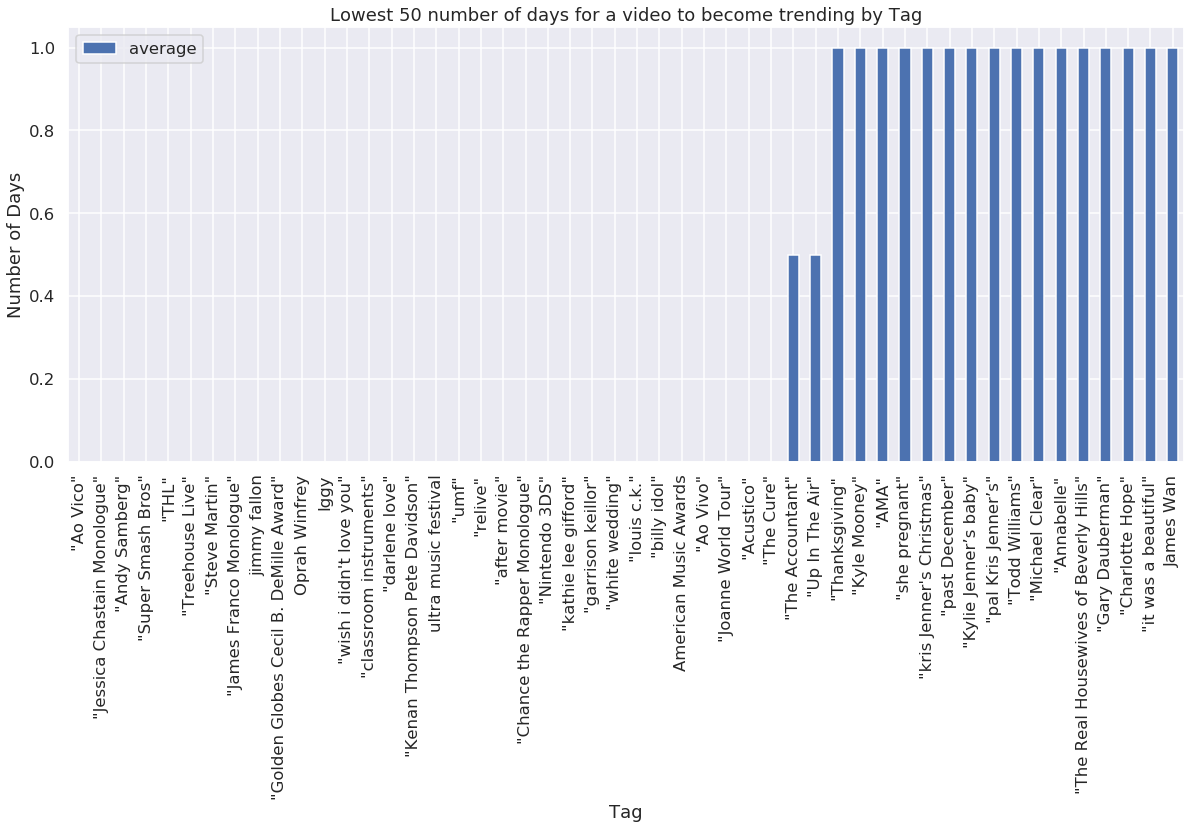

In [94]:
TagAverageTrending = tag_differences.nsmallest(50, 'average').plot.bar(title='Lowest 50 number of days for a video to become trending by Tag', figsize=(20,8))
TagAverageTrending.set_xlabel("Tag")
TagAverageTrending.set_ylabel("Number of Days")

[Number of days to become trending by tags]

When looking at trending tags that have the least number of days that it takes for that video to become trending, we can see that most of them are about events and topics that people care about. For example, “Super Smash Bros” was a tag in a video that was trending on the day that it was posted. However, it is also important to note that there is a possibility that some of these tags are from the same video, for example “umf” and  “ultra music festival” are in fact the same event. Nonetheless, we can still see that the tags that are in videos that trended on the day that it was posted were usually extremely specific and related to the content of the video. Therefore, for YouTubers trying to minimize the time that their video becomes trending, changing the tags wouldn’t help much as tags did not seem to be a factor in the number of days that a video becomes trending.

In [95]:
# q3 stuff
# How quickly do trends change over time? 
# Has this rate been increasing/decreasing? 
# What topics remain constant over time?
print(df_USVids.columns)
print(df_TimeAndWeek.columns)

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'comments_disabled', 'ratings_disabled', 'video_error_or_removed',
       'description'],
      dtype='object')
Index(['video_id', 'category_id', 'tags', 'trending_date', 'title',
       'publish_time', 'views', 'publish_date', 'publish_date_of_week',
       'date_difference'],
      dtype='object')


In [96]:
# sanitize in similar manner as q2, but keep around more columns
df_q3 = df_TimeAndWeek.copy()

# restore descriptions column
df_descriptions_temp = df_USVids[['video_id', 'description']]
df_q3 = pd.merge(df_q3, df_descriptions_temp, on='video_id', how='outer')

In [97]:
# number of days a video has been trending, not necessarily consecutively
daysTrending = df_USVids[['video_id', 'title']].copy()

# get the count of id instances, need original df for this again
df_USVids2 = pd.read_csv("USvideos_idsReplaced.csv")
df_USVids2['days_trending'] = df_USVids2.groupby('video_id')['video_id'].transform('count')

daysTrending = pd.merge(daysTrending, df_USVids2[['video_id', 'days_trending']], on='video_id', how='outer')

# safe to drop duplicates again
daysTrending.drop_duplicates(subset='video_id', keep="last", inplace=True)
daysTrending.drop('video_id', axis=1)

# (number of days a video was trending) : (instances of that amount)
dayCounts = daysTrending['days_trending'].value_counts()

print(daysTrending['days_trending'])
print(dayCounts)

0         1
1         1
2         1
         ..
40919    26
40922     3
40948    26
Name: days_trending, Length: 6351, dtype: int64
6     764
1     707
7     704
     ... 
29      7
26      3
30      1
Name: days_trending, Length: 30, dtype: int64


In [98]:
days_count_avg = 0
divisor = 0
for i in dayCounts.index.tolist():
    divisor = divisor + dayCounts[i]
    days_count_avg = days_count_avg + ((i) * dayCounts[i])

days_count_avg = days_count_avg/divisor

print("Average Number of Days Trending (Nonconsecutive): ", days_count_avg)

days_oneshot = dayCounts[1]

print("Number of One-Shots (only trending for one day): ", days_oneshot)

days_count_max = max(dayCounts.index.tolist())

print("Greatest Number of Days Trending: ", days_count_max)

longest_trending_videos = daysTrending[daysTrending['days_trending'] == days_count_max]

print("List of the Longest Trending Video(s): ")
for i in longest_trending_videos['title']:
    print('\t', i, "(", days_count_max, "days )")

print('\n')

days_count_second_max = 29 # just hardcoding should be fine...
second_longest_trending_videos = daysTrending[daysTrending['days_trending'] == days_count_second_max]
for i in second_longest_trending_videos['title']:
    print('\t', i, "(", days_count_second_max, "days )")
    
print('\n')

days_count_third_max = 28 # just hardcoding should be fine...
third_longest_trending_videos = daysTrending[daysTrending['days_trending'] == days_count_third_max]
for i in third_longest_trending_videos['title']:
    print('\t', i, "(", days_count_third_max, "days )")

Average Number of Days Trending (Nonconsecutive):  6.44764603999
Number of One-Shots (only trending for one day):  707
Greatest Number of Days Trending:  30
List of the Longest Trending Video(s): 
	 WE MADE OUR MOM CRY...HER DREAM CAME TRUE! ( 30 days )


	 Sam Smith - Pray (Official Video) ft. Logic ( 29 days )
	 Charlie Puth - BOY [Official Audio] ( 29 days )
	 YoungBoy Never Broke Again Goes Sneaker Shopping With Complex ( 29 days )
	 周杰倫 Jay Chou【不愛我就拉倒 If You Don't Love Me, It's Fine】Official MV 發燒影片華語地區蟬聯第一 美國直衝前二 ( 29 days )
	 Why I'm So Scared (being myself and crying too much) ( 29 days )
	 Rooster Teeth Animated Adventures - Millie So Serious ( 29 days )
	 The ULTIMATE $30,000 Gaming PC Setup ( 29 days )


	 Getting some air, Atlas? ( 28 days )
	 John Mayer - New Light ( 28 days )
	 Cobra Kai Season 2 ( 28 days )
	 The Deadliest Being on Planet Earth – The Bacteriophage ( 28 days )
	 FORTNITE The Movie (Official Fake Trailer) ( 28 days )
	 Rita Ora - Girls ft. Cardi B, Bebe R

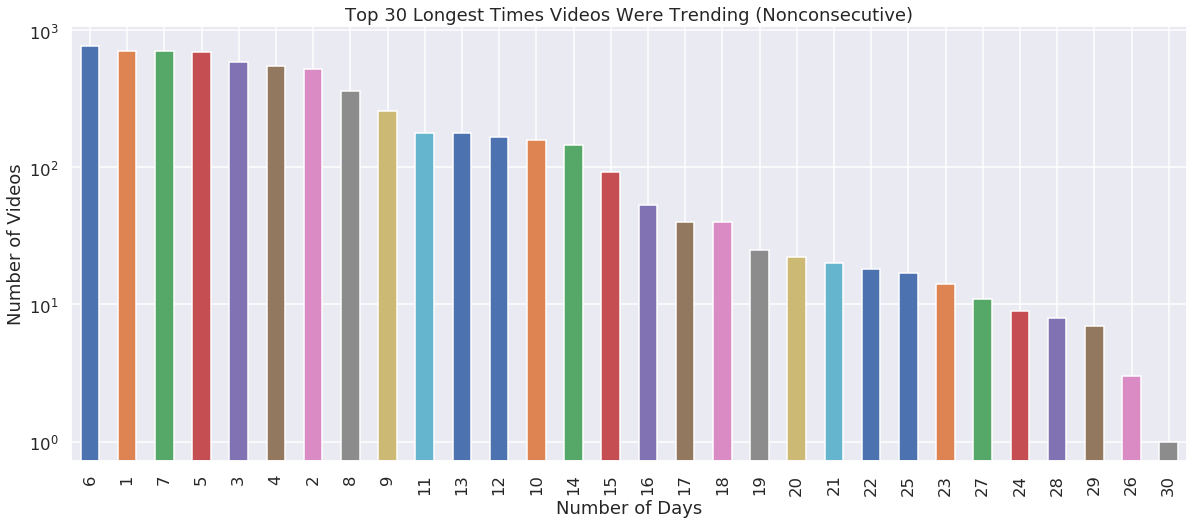

In [99]:
DaysTrended = dayCounts.nlargest(30).plot.bar(title='Top 30 Longest Times Videos Were Trending (Nonconsecutive)', figsize=(20,8))
DaysTrended.set_xlabel("Number of Days")
DaysTrended.set_ylabel("Number of Videos")
DaysTrended.set_yscale('log')

[Trending Video Analysis]
Trending videos are defined as videos that have reached trending status either the maximum number of days a video can trend or up to two days less than the maximum. Through analysis, it was determined that the maximum number of times a video trended was 30 days. The majority of videos only trended 7 times or less. This means the dropoff for video relevancy is around 7 days, though this may be a nonconsecutive amount. 

Among videos that had been trending for 28, 29, or 30 days, eEntertainment was the most popular category, followed by Film & Animation. While tag analysis was performed, the results did not reveal anymuch meaningful information due to the diversity in tags listings. 

Notably, none of the 16 videos that trended for 28, 29, or 30 days were among the 16 most viewed videos. This may mean that simply reaching trending status is not enough to guarantee popularity. It may also imply that YouTube promotes content that steadily gains views, even if the number isn't particularly large. 


In [100]:
# assess relationship between longest trending videos and their views

# defined as videos that trended for 30, 29, or 28 days
days_frames_to_concat = [longest_trending_videos,second_longest_trending_videos,third_longest_trending_videos]
all_longest_trending_videos = pd.concat(days_frames_to_concat)

all_longest_trending_videos_views = {}

# loop through all videos to find number of views, refer to original df to do so
for j in all_longest_trending_videos['title']:
    for i,row in df_q3.iterrows():
        if row['title'] == j:
            all_longest_trending_videos_views[j] = row['views']

# find the 16 most viewed videos
top_viewed_temp_1 = df_q3['views'].nlargest(16)
top_viewed_temp_1_indexes = top_viewed_temp_1.index.tolist()
top_viewed_videos = []
top_viewed_videos_dict = {}
i_temp = 0
for i in top_viewed_temp_1:
    # i = the views, top_viewed...[i_temp] = indexes
    current_index = top_viewed_temp_1_indexes[i_temp]
    top_viewed_videos.append(df_q3['title'][current_index])
    top_viewed_videos_dict[df_q3['title'][current_index]] = df_q3['views'][current_index]
    i_temp += 1

In [101]:
# find intersection
no_similarities_between_popularity_and_trending = True
for i in all_longest_trending_videos_views:
    for j in top_viewed_videos_dict:
        if i == j:
            no_similarities_between_popularity_and_trending = False
            print(i)

if no_similarities_between_popularity_and_trending == True:
    print('No similar videos found!')

No similar videos found!


In [102]:
longest_trending_videos_titles = all_longest_trending_videos_views
df_toptrending = df_q3.copy()

# chart the top tags for the top 16 trending videos
counter = 0
for index,j in df_toptrending.iterrows():
    dont_drop = False
    for i in longest_trending_videos_titles:
        if j['title'] == i:
            dont_drop = True
            
    if dont_drop == False:
        df_toptrending = df_toptrending.drop([index])
            
df_toptrending = explode(df_toptrending, ['tags'], '|')

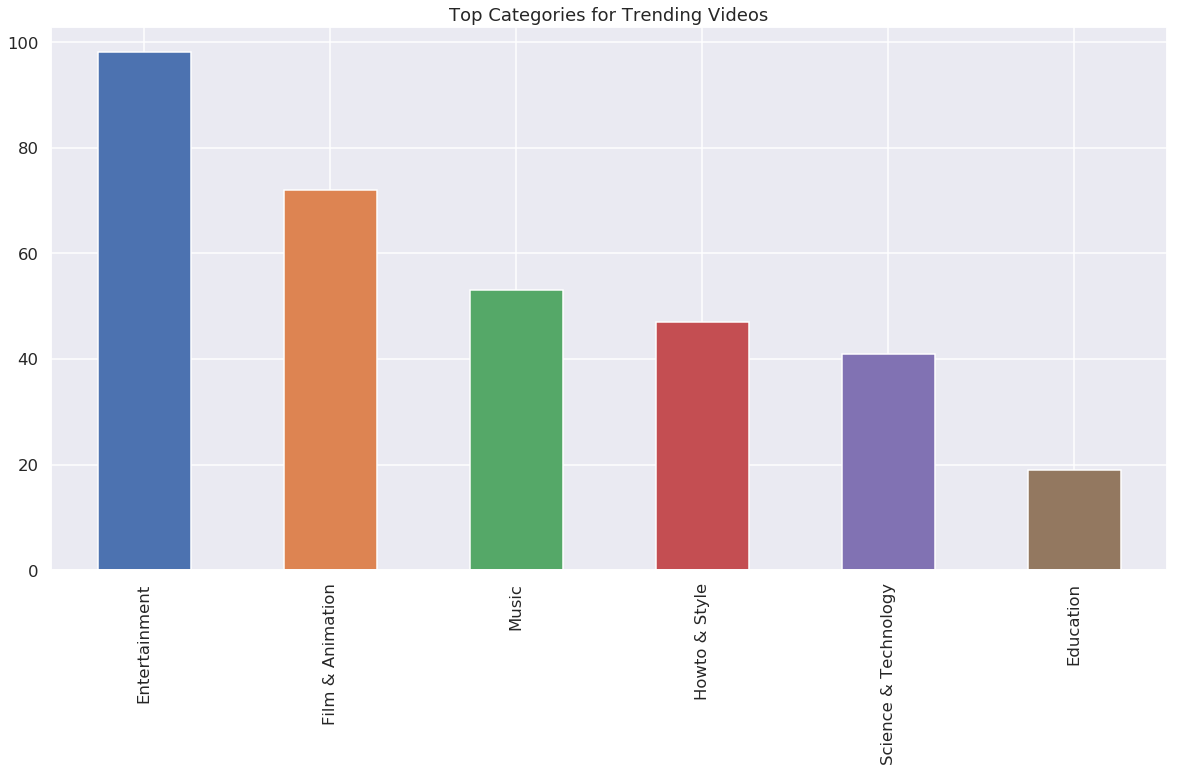

In [103]:
# chart the top categories for the top 16 videos
Trending_Categories = df_toptrending['category_id'].value_counts().nlargest(10, 'first').plot.bar(x='tags', y='views', title='Top Categories for Trending Videos', figsize=(20,10))

In [104]:
oneshots = daysTrending[daysTrending.days_trending == 1]
oneshots_stats = pd.merge(oneshots, df_q3, on='video_id', how='inner')

# some basic stats for oneshots:
print("Oneshot mean views: ", oneshots_stats['views'].mean())
print("Overall mean views: ", df_q3['views'].mean())
print('')
print("Oneshot median views: ", oneshots_stats['views'].median())
print("Overall median views: ", df_q3['views'].median())

Oneshot mean views:  543646.626591
Overall mean views:  1962117.24075

Oneshot median views:  233766.0
Overall median views:  518107.0


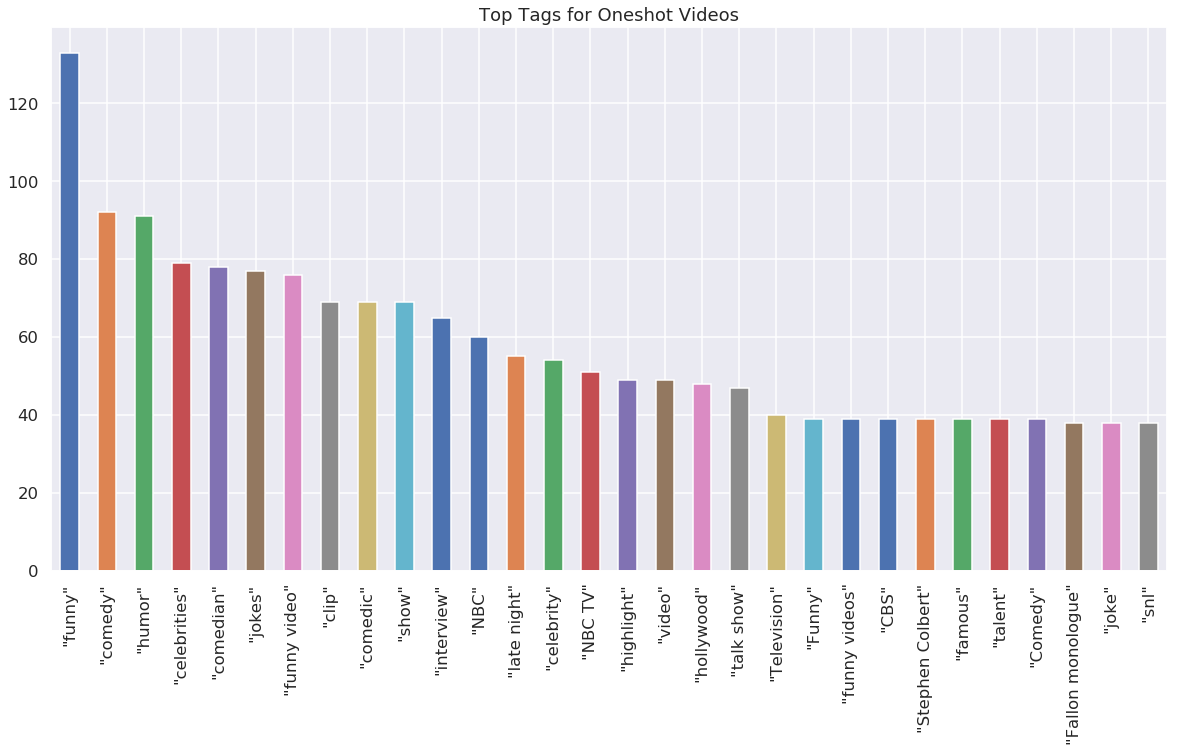

In [105]:
# chart the top tags for the oneshot videos
exploded_oneshots = pd.merge(oneshots, df_q3, on='video_id', how='inner')
exploded_oneshots = explode(exploded_oneshots, ['tags'], '|')

Oneshot_Tags = exploded_oneshots['tags'].value_counts().nlargest(30, 'first').plot.bar(x='tags', y='views', title='Top Tags for Oneshot Videos', figsize=(20,10))

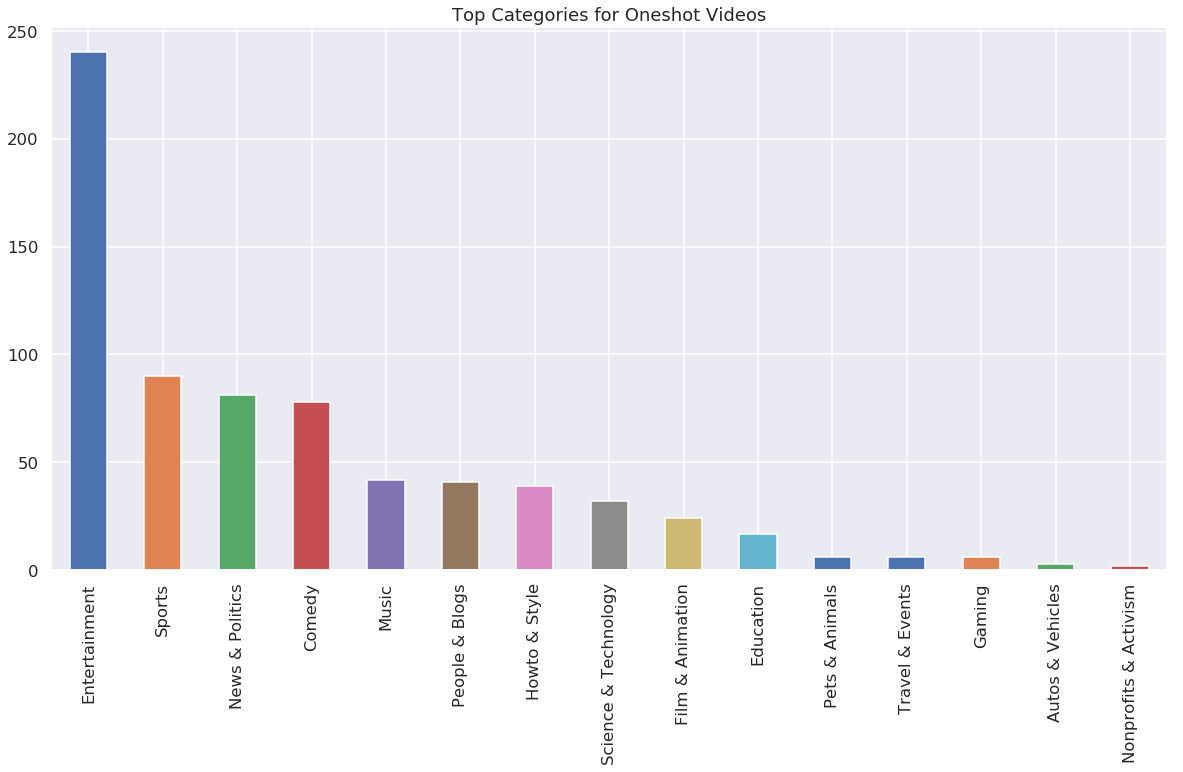

In [106]:
# chart the top categories for the oneshot videos
new_oneshots = pd.merge(oneshots, df_q3, on='video_id', how='inner')

Oneshot_Categories = new_oneshots['category_id'].value_counts().nlargest(30, 'first').plot.bar(x='tags', y='views', title='Top Categories for Oneshot Videos', figsize=(20,10))

["Oneshot" Video Analysis]

"Oneshot" videos are defined as videos that only reach trending status once. The average and median number of views for these videos is about half as much as that of all videos, implying videos that reach trending status once are not as successful as those that reach it more times. 

The top tags for "oneshot" videos are fairly generic, with "funny" being the top tag used among them, and the vast majority of these videos are in the Entertainment category. This may be because these videos don't promote repeat views. However, Entertainment was also the most popular category among trending videos, so there may not actually be a correlation. 


In [107]:
# Extract data set for q3
# How has the content distribution changed over time to reflect trends?
# trending date, title, publish time, tags, description
df = df_USVids[['tags', 'title', 'publish_time', 'description', 'trending_date']].copy()

In [108]:
df.head(3)

,tags,title,publish_time,description,trending_date
10,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...,2017-11-13T02:05:26.000Z,New England Patriots returner Dion Lewis blast...,17.14.11
36,"screenjunkies|""screen junkies""|""sj news""|""hone...",TL;DW - Every DCEU Movie Before Justice League,2017-11-12T18:00:03.000Z,With Justice League approaching fast we rewatc...,17.14.11
41,"bbc|""bbc news""|""news""|""iran""|""iran news""|""iraq...",Iraq-Iran earthquake: Deadly tremor hits borde...,2017-11-12T21:16:40.000Z,A strong 7.2-magnitude earthquake has rattled ...,17.14.11


## Bigram Frequencies for Descriptions
Using the FreqDist function from the nltk library, I calculated the bigram frequencies of the descriptions from the trending videos. I decided to go with bigrams because single words tend to have less context.

In [109]:
#join together the descriptions
descripts = ' '.join(df.description.apply(lambda x: x.lower() if x == x else ''))

In [110]:
#split into words
words = descripts.split()

In [111]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

#remove stopwords (words we're not interested in)
stop_words = set(stopwords.words('english'))
stop_words.add("_")
stop_words.add("-")
words = [word.lower() for word in words if word.lower() not in stop_words]

[nltk_data] Downloading package stopwords to /home/xxzou/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [112]:
bgpairs = nltk.bigrams(words)
#frequency of bigram pairs 
freqdist = nltk.FreqDist(bgpairs)

In [113]:
#this is to help display the bigrams better 
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.rcParams['figure.figsize'] = (25.0, 10.0)

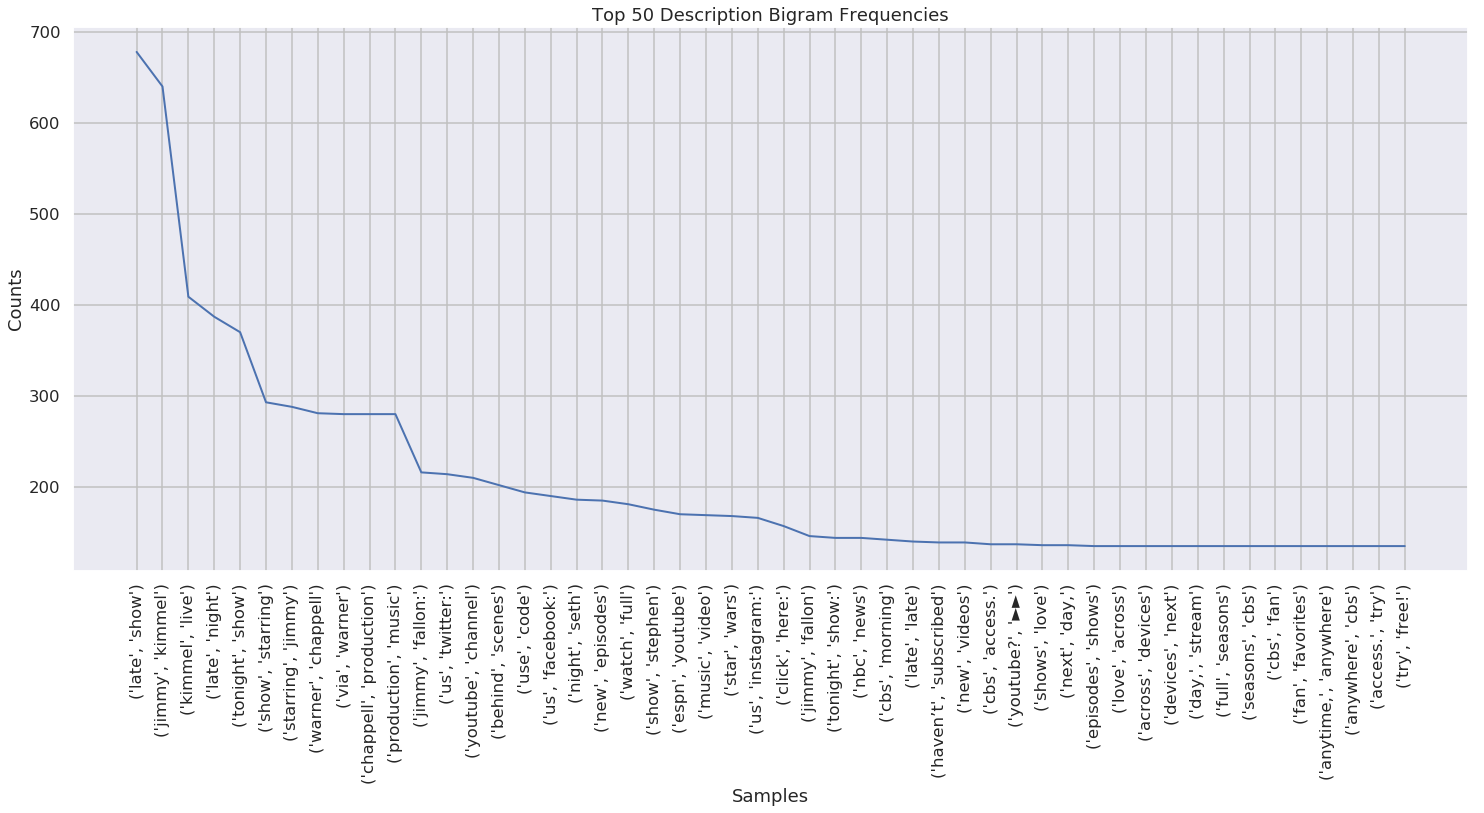

In [114]:
freqdist.plot(50, title='Top 50 Description Bigram Frequencies')

[Bigram Analysis]

We noticed a difference in the number of views of a video to the frequency of video content. For example, music videos generally have the most views in the trending video list. But there are more videos related to the “Late Night Show’ and “Jimmy Kimmel Show” in the trending video list than there are music videos. The bigram breakdown of the descriptions revealed a difference between tag perceived content and description defined content.


Now I want to dig deeper into the top trending videos. The description bigrams seem to repeat "jimmy kimmel" and "late show" alot. I want to see if there are actually more videos trending than expected or if the descriptions for these videos are simply repetitive.

In [115]:
listStrings = ['kimmel', 'tonight show', 'jimmy kimmel', 'late night']
#jkDF = df[df['description'].str.contains(listStrings, na=False)]
jkDF = df[df['description'].str.contains('|'.join(listStrings), na=False)]
jkDF

,tags,title,publish_time,description,trending_date
78,"James Corden|""The Late Late Show""|""Colbert""|""l...",Jason Momoa & Lisa Bonet: Love at First Sight,2017-11-10T09:35:00.000Z,James congratulates Jason Momoa on recently ma...,17.14.11
297,"James Corden|""The Late Late Show""|""Colbert""|""l...",Jaden Smith: Watch Me,2017-11-14T06:47:03.000Z,Late Late Show music guest Jaden Smith perform...,17.15.11
380,"The Late Show|""Stephen Colbert""|""Colbert""|""Lat...",Sean Astin Knew Nothing About 'Lord Of The Rin...,2017-11-09T08:35:00.000Z,Stranger Things' star Sean Astin thought he wa...,17.15.11
...,...,...,...,...,...
40762,"The Late Late Show|""Late Late Show""|""James Cor...",Drop the Mic w/ Ashton Kutcher & Sean Diddy Combs,2018-06-13T05:27:27.000Z,James Corden and Ashton Kutcher square off in ...,18.14.06
40829,"The Late Show|""Late Show""|""Stephen Colbert""|""S...",Ethan Hawke Knows To Seek Knowledge From Masters,2018-06-05T07:53:32.000Z,First Reformed' star Ethan Hawke knows to stay...,18.14.06
40842,"23andme|""Dad""|""Fathers Day""|""Ghana""|""Kenya""|""G...",Eating With My DAD!,2018-06-03T13:00:01.000Z,►Check out: https://www.23andme.com/markwiensT...,18.14.06


## Noises that affects our result:

-Our dataset only contains data related videos that have reached trending status. It's possible that there are videos that are enduringly popular but never made it to the trending bar. YoutubeYouTube's own internal algorithms are also a factor that was unaccounted for.

-Foreign country VPN use into the YoutubeYouTube platform has caused videos to be trending in the US data even though viewers are from other countries. For example, in countries like China where YoutubeYouTube is banned, the video views convert to data for US mostly, but, Japan, Korea, etc. 
 are also possible.

-Our dataset also doesn't take into account the contents of the video itself. For example, all of the most popular videos could be team productions, meaning people enjoy watching high quality team produced videos. There is also the possibility of video tags and content type not accurately representing the video itself. 

-Our data set is limited to time frame from November 14, 2017 to June 14, 2018. We did not analyze time periods outside of the range and we are aware that video trends can widely vary due to political and social influences. Additionally, since there is no data past this date, any suggested practices resulting from our analysis may be outdated. 


# ETHICS & PRIVACY: 
Legality of the Youtube Stats: Youtube’s API allows independent developers and statisticians to download and analyze video stats within the agreement terms found on this webpage: https://developers.google.com/youtube/terms/api-services-terms-of-service

Since we downloaded the dataset from Kaggle, we assume in good faith that the dataset provider is registered and of legal binding contract age. 

## Data Bias
Sponsorships behind the videos using the music video as a form of advertisement can raise the views synthetically through spending more money on Youtube’s advertising platform, causing the origin of views to become unclear. For example, television advertisements about an upcoming movie could prompt users to search for a trailer on Youtube, independent of Youtube's own discovery mechanisms. In such a situation, the video would have been deemed popular, but not make it onto the trending videos dataset. 
It's unknown if Youtube deranks some videos based on content, preventing them from reaching trending status despite popularity. YouTube's bias in video content.


There are three main concerns of abuse regarding our analysis and the data used for it: 

-Abuse of the analysis

-Abuse of trending content, and abuse of ownership

-There are additionally privacy concerns. 

Understanding data is important for Youtubers to amass more users. However, this can lead the Youtuber to publish content that is insensitive purely for the sake of more viewership. For example, Jake Paul’s video on the Suicide Forest. Additionally, if controversial content is related to popularity, Youtube itself benefits more from promoting insensitive videos, misinformation, etc. if it results in more views, as a result of gaining more revenue from companies using Youtube as an advertising platform. 

Our analysis can potentially be abused through people determining which tags and categories are the most popular, and posting videos with those tags instead of accurate ones. This pollutes future data, and may be used to give propaganda an initial boost. Also, since our analysis contains time information, people can abuse this through targeting the period of time videos receive the most views (the period of time Youtube has the highest amount of traffic), and perform a DDOS attack. Similar attacks have occurred in the past hacker attacks9, and our analysis may make similar attacks more common. 

Since Youtube is one of the biggest platforms for distributing video content with little or no reviews, it can potentially distribute inappropriate or incorrect information that misguides people on the web. Fake facts and news is a major ethical issue.

People can use popular data to see what videos will make the most when pirated, illegally putting it on their own page. Content stealers may target videos that reached trending status once, since the videos are popular and will gain revenue while not being so high-profile to attract too many reports for stolen content. 
 
Since we are using YouTube’s data, we are agreeing to YouTube’s Terms of Service, Google’s Privacy Policy and YouTube’s Community Guidelines. While the data can be arguably considered a breach of the content producer's privacy as there does not appear to be an option that allows a content creator to keep their video statistics private, this is more of an issue related to Google's terms of service than our analysis.

Because of the hidden bias contained in the dataset, we can’t make conclusions on the monetary gain correlated with the popularity of a video. The production, advertisement, and sponsorship costs can skew the actual popularity of the content. Keeping the noises and biases in mind, we are only able to give limited conclusions to the analyses. 



# DISCUSSION & CONCLUSION: 
We started off our project with no idea of how the Youtube algorithm chooses it’s trending videos. We learned that Youtube promotes normalized growth for smaller channels. Our results show our initial hypothesis was slightly off - our definition of popularity was based on view count, but it appears Youtube instead determines if a video is popular through growth over time. View count is just an all time counter, but trending status is determined by growth and relevance to current trends. There's two kinds of popularity in act: all time popularity and current popularity. Music and entertainment has high rewatch value and isn't as affected by trends, while the news is more heavily affected. Therefore, it is reasonable how music and entertainment usually have more views (all time popularity). Whereas shows (Late night shows) and news tends to have less rewatch rate but they can significant growth in view count due to current trending topics. 

As for things that we could explore more into, we could gather more samples for like/dislike and see if it correlates with other factors (views, tags, etc). Previous analyses shows that view is a deciding factor of like counts. However, our results did not support this hypothesis. The reason could be due to insufficient samples and the time frame of our sample relatively short, roughly one year of collected data. Our results didn't match up with the article claims online for the best day to publish videos. We found Wednesday to be the quickest time for a video to become trending based on publish date and trending date. We also found that although tags revealed music to be the prevalent content, the video descriptions told another story. Political news which was found to be one of the least liked tags on YouTube had the most number of trending videos out of any other content. 

The analysis can be improved upon in the future through incorporating video comments and performing sentiment analysis to get a more detailed report on video controversy. Natural language processing can also be applied to repetitious tags. This would prevent one category from being overly inflated in frequency. It's also necessary to keep in mind that the descriptions, tags, and categories may not match up to a video's content. While we attempted to demystify Youtube's trending algorithm, there's still a lot of mystery surrounding it, and it's likely there are factors inherent to the algorithm such as manual removals that skew with our data. 



# CITATIONS:
1. "The YouTube Video Recommendation System." ACM Digital Library. Accessed April 21, 2019. https://dl.acm.org/citation.cfm?id=1864770.

2. "Using Online Video Ads For Your Business – YouTube Advertising." YouTube. Accessed April 21, 2019. https://www.youtube.com/ads/how-it-works/.

3. "Statistics and Social Network of YouTube Videos 3 Author(s) Xu Cheng ; Cameron Dale ; Jiangchuan Liu." Statistics and Social Network of YouTube Videos - IEEE Conference Publication. Accessed April 21, 2019. https://ieeexplore.ieee.org/abstract/document/4539688.

4. "Exploring YouTube Trending Statistics EDA." Kaggle. Accessed April 21, 2019. https://www.kaggle.com/donyoe/exploring-youtube-trending-statistics-eda.

5. "Exploring YouTube Trending Statistics EDA | Kaggle" Kaggle. Accessed April 21, 2019. https://www.kaggle.com/donyoe/exploring-youtube-trending-statistics-eda. 

6. "What is Trending on YouTube? [EDA with Python] | Kaggle" Kaggle. Accessed April 21, 2019. https://www.kaggle.com/quannguyen135/what-is-trending-on-youtube-eda-with-python.

7. "**DEEP ANALYSIS on YouTube Trending Videos - EDA | Kaggle" Kaggle. Accessed April 21, 2019. https://www.kaggle.com/hoonkeng/deep-analysis-on-youtube-trending-videos-eda. 

8. “YouTube's Most Popular Video Got Hacked and Defaced | TheINQUIRER.” , Coyler, Roland Moore. Accessed 10 May. 2018, www.theinquirer.net/inquirer/event/3029909/youtubes-most-popular-video-despacito-got-hacked-and-defaced.

9. Gielen, Matt. “Want To Know The Best Days And Times To Post YouTube Videos? Here's A Yearly Calendar.” Tubefilter, 12 Jan. 2015, www.tubefilter.com/2015/01/12/best-days-times-to-post-youtube-videos-yearly-calendar/.
